In [4]:
import json
import csv
import os
import time
from datetime import timedelta, date, datetime
import requests
import pandas as pd
import numpy as np
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns


In [5]:
sns.set_palette("deep", desat=.6)
colors = sns.color_palette("deep")
sns.set_context(rc={"figure.figsize": (50, 20)})
pd.set_option('display.max_columns', 500)
transit_csv= "data.csv"
transit_df = pd.read_csv(transit_csv)

In [31]:
def get_conditions(readDate):
    api_conditions_url = "http://api.wunderground.com/api/" + WUNDERGROUND_API_KEY + "/history_" + readDate + "/q/" + STATE +"/"+ CITY + ".json"
    try:
        f = requests.get(api_conditions_url).json()
        print(api_conditions_url)
    except:
        print("Failed to get conditions")
        return False
    if CITY == "SCE":
        return False
    else:
        return f

In [32]:
csv_path = "data.csv"
weather_df = pd.read_csv(csv_path, low_memory=False)
weather_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2017,3,9,25,1,9/25/2017,B6,20409,B6,N766JB,...,68,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,3,9,25,1,9/25/2017,B6,20409,B6,N834JB,...,1698,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,3,9,25,1,9/25/2017,B6,20409,B6,N834JB,...,1698,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,3,9,25,1,9/25/2017,B6,20409,B6,N571JB,...,718,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,3,9,25,1,9/25/2017,B6,20409,B6,N571JB,...,718,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CREATE CHART WITH WEATHER

In [33]:
weather_delays_df = weather_df.loc[((weather_df["WEATHER_DELAY"] > 0)) & ((weather_df["ORIGIN"]=="PHL") | (weather_df["ORIGIN"]=="DFW") | (weather_df["ORIGIN"]=="BOS") | (weather_df["ORIGIN"]=="JFK") | (weather_df["ORIGIN"]=="IAH") | (weather_df["ORIGIN"]=="DEN") | (weather_df["ORIGIN"]=="LGA") | (weather_df["ORIGIN"]=="ORD") | (weather_df["ORIGIN"]=="EWR") | (weather_df["ORIGIN"]=="SFO") | (weather_df["DEST"]=="PHL") | (weather_df["DEST"]=="DFW") | (weather_df["DEST"]=="BOS") | (weather_df["DEST"]=="JFK") | (weather_df["DEST"]=="IAH") | (weather_df["DEST"]=="DEN") | (weather_df["DEST"]=="LGA") | (weather_df["DEST"]=="ORD") | (weather_df["DEST"]=="EWR") | (weather_df["DEST"]=="SFO")) & (weather_df["DEST"]!="OMA") & (weather_df["ORIGIN"]!="OMA"),:]
weather_delays_df.reset_index(inplace=True)
weather_delays_df.head()

,index,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,1293,2017,3,9,27,3,9/27/2017,B6,20409,B6,...,2602,11,0.0,68.0,7.0,0.0,0.0,1758.0,42.0,42.0
1,1670,2017,3,9,27,3,9/27/2017,B6,20409,B6,...,173,1,0.0,18.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1872,2017,3,9,28,4,9/28/2017,B6,20409,B6,...,1065,5,0.0,81.0,15.0,0.0,0.0,NaN,NaN,NaN
3,2129,2017,3,9,28,4,9/28/2017,B6,20409,B6,...,1065,5,0.0,44.0,6.0,0.0,0.0,NaN,NaN,NaN
4,3080,2017,3,9,29,5,9/29/2017,B6,20409,B6,...,1028,5,0.0,24.0,0.0,0.0,0.0,NaN,NaN,NaN


In [142]:
weather_map_df = pd.DataFrame(weather_delays_df.loc[:,["YEAR", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK",
                                          "FL_DATE","CARRIER","ORIGIN","ORIGIN_STATE_ABR","DEST","DEST_STATE_ABR","DEP_TIME","CRS_ARR_TIME","WEATHER_DELAY","CANCELLATION_CODE"]])
weather_map_df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,DEP_TIME,CRS_ARR_TIME,WEATHER_DELAY,CANCELLATION_CODE
0,2017,9,27,3,9/27/2017,B6,BOS,MA,LGB,CA,1916.0,2131,68.0,NaN
1,2017,9,27,3,9/27/2017,B6,JFK,NY,MVY,MA,1154.0,1229,18.0,NaN
2,2017,9,28,4,9/28/2017,B6,FLL,FL,EWR,NJ,1942.0,2114,81.0,NaN
3,2017,9,28,4,9/28/2017,B6,FLL,FL,EWR,NJ,1302.0,1513,44.0,NaN
4,2017,9,29,5,9/29/2017,B6,PBI,FL,JFK,NY,1647.0,1900,24.0,NaN


In [7]:
weather_map_df["Conds_Description"] = "conds"
weather_map_df["Visibility"] = 0.0
weather_map_df["Pressure"] = 0.0
weather_map_df["Precipitation"] = 0.0
weather_map_df["Wind"] = 0.0
weather_map_df["Wind_Gust"] = 0.0 
weather_map_df["Fog"] = 0.0
weather_map_df["Snow"] = 0.0
weather_map_df["Temp"] = 0.0
weather_map_df["Thunder"] = 0.0
weather_map_df["Tornado"] = 0.0
weather_map_df["Rain"] = 0.0
weather_map_df["Hail"] = 0.0

weather_map_df["Dest_Conds_Description"] = "conds"
weather_map_df["Dest_Visibility"] = 0.0
weather_map_df["Dest_Pressure"] = 0.0
weather_map_df["Dest_Precipitation"] = 0.0
weather_map_df["Dest_Wind"] = 0.0
weather_map_df["Dest_Wind_Gust"] = 0.0 
weather_map_df["Dest_Fog"] = 0.0
weather_map_df["Dest_Snow"] = 0.0
weather_map_df["Dest_Temp"] = 0.0
weather_map_df["Dest_Thunder"] = 0.0
weather_map_df["Dest_Tornado"] = 0.0
weather_map_df["Dest_Rain"] = 0.0
weather_map_df["Dest_Hail"] = 0.0

In [143]:
STARTDATE2 = ""
WUNDERGROUND_API_KEY = "aa2877982956f024"
BUCKET_KEY = "wu1"
ACCESS_KEY = "aa2877982956f024"

weather_delays_count = len(weather_map_df)
for row in range(weather_delays_count-1):
    STATE = weather_map_df.iloc[row]["ORIGIN_STATE_ABR"]
    CITY = weather_map_df.iloc[row]["ORIGIN"]
    row_year = int(weather_map_df.iloc[row]["YEAR"])
    row_month = int(weather_map_df.iloc[row]["MONTH"])
    row_day = int(weather_map_df.iloc[row]["DAY_OF_MONTH"])
    
    STARTDATE2 = date(row_year,row_month,row_day)
    
    date_wu = []
    humidity_wu = []
    temp_wu = []
    pressure_wu = []
    precip_wu = []
    wind_speed_wu = []
    dewpt_wu = []
    wind_gust_wu = []
    wind_dir_wu = []
    vis_wu = []
    wind_chill_wu = []
    heat_index_wu = []
    conds_wu = []
    fog_wu = []
    rain_wu = []
    snow_wu = []
    hail_wu = []
    thunder_wu = []
    tornado_wu = []
    
    dest_date_wu = []
    dest_humidity_wu = []
    dest_temp_wu = []
    dest_pressure_wu = []
    dest_precip_wu = []
    dest_wind_speed_wu = []
    dest_dewpt_wu = []
    dest_wind_gust_wu = []
    dest_wind_dir_wu = []
    dest_vis_wu = []
    dest_wind_chill_wu = []
    dest_heat_index_wu = []
    dest_conds_wu = []
    dest_fog_wu = []
    dest_rain_wu = []
    dest_snow_wu = []
    dest_hail_wu = []
    dest_thunder_wu = []
    dest_tornado_wu = []

    conditions = get_conditions(STARTDATE2.strftime("%Y%m%d"))

    if (conditions != False):
        for i in range(len(conditions['history']['observations'])):
            dateInfo = conditions['history']['observations'][i]['date']
            date_holder = dateInfo['mon']+"/"+dateInfo['mday']+"/"+dateInfo['year']+" "+dateInfo['hour']+dateInfo['min']
            pattern = '%m/%d/%Y %H%M'
            date_wu.append(date_holder)
            epoch = int(time.mktime(time.strptime(date_holder, pattern)))

            humidity_wu.append(conditions['history']['observations'][i]['hum'])
            temp_wu.append(conditions['history']['observations'][i]['tempi'])
            pressure_wu.append(conditions['history']['observations'][i]['pressurei'])
            precip_wu.append(conditions['history']['observations'][i]['precipi'])
            wind_speed_wu.append(conditions['history']['observations'][i]['wspdi'])
            dewpt_wu.append(conditions['history']['observations'][i]['dewpti'])
            wind_gust_wu.append(conditions['history']['observations'][i]['wgusti'])
            wind_dir_wu.append(conditions['history']['observations'][i]['wdird'])
            vis_wu.append(conditions['history']['observations'][i]['visi'])
            wind_chill_wu.append(conditions['history']['observations'][i]['windchilli'])
            heat_index_wu.append(conditions['history']['observations'][i]['heatindexi'])
            conds_wu.append(conditions['history']['observations'][i]['conds'])
            fog_wu.append(conditions['history']['observations'][i]['fog'])
            rain_wu.append(conditions['history']['observations'][i]['rain'])
            snow_wu.append(conditions['history']['observations'][i]['snow'])
            hail_wu.append(conditions['history']['observations'][i]['hail'])
            thunder_wu.append(conditions['history']['observations'][i]['thunder'])
            tornado_wu.append(conditions['history']['observations'][i]['tornado'])

        obs_df = pd.DataFrame({
            "Date":date_wu,
            "Temp":temp_wu,
            "Pressure":pressure_wu,
            "Precipitation":precip_wu,
            "Wind_Gust":wind_gust_wu,
            "Wind":wind_speed_wu,
            "Visibility":vis_wu,
            "Conds_Description":conds_wu,
            "Fog":fog_wu,
            "Rain":rain_wu,
            "Snow":snow_wu,
            "Hail":hail_wu,
            "Thunder":thunder_wu,
            "Tornado":tornado_wu
        })

        military_time = int(weather_map_df.iloc[row]["DEP_TIME"])
        if military_time < 1000:
            time_str = "0" + str(military_time)
        else:
            time_str = str(military_time)

        rcd_time = str(row_month) + "/" + str(row_day) + "/" + str(row_year) + " " + str(time_str)
        rec_time = datetime.strptime(rcd_time, '%m/%d/%Y %H%M')

        closest_time = rec_time
        min_diff = 99999999999

        converted_timestamps = []
        for raw_time in date_wu:
            converted_time = datetime.strptime(raw_time, '%m/%d/%Y %H%M')
            converted_timestamps.append(converted_time)
            diff = rec_time - converted_time
            if diff.seconds < min_diff:
                min_diff = diff.seconds
                closest_time = converted_time

        closest = closest_time.strftime("%m/%d/%Y %H%M")        

        observation = obs_df.loc[obs_df["Date"]==closest,:]
        observation_fog = observation["Fog"]
        observation_pressure = observation["Pressure"]
        observation_snow = observation["Snow"]
        observation_temp = observation["Temp"]
        observation_thunder = observation["Thunder"]
        observation_wind = observation["Wind"]
        observation_wind_gust = observation["Wind_Gust"]
        observation_rain = observation["Rain"]
        observation_tornado = observation["Tornado"]
        observation_visibility = observation["Visibility"]
        observation_conds_description = observation["Conds_Description"]
        observation_precipitation = observation["Precipitation"]
        observation_hail = observation["Hail"]

        weather_map_df.loc[row,"Fog"] = float(observation_fog)
        weather_map_df.loc[row,"Pressure"] = float(observation_pressure)
        weather_map_df.loc[row,"Snow"] = float(observation_snow)
        weather_map_df.loc[row,"Temp"] = float(observation_temp)
        weather_map_df.loc[row,"Thunder"] = float(observation_thunder)
        weather_map_df.loc[row,"Wind"] = float(observation_wind)
        weather_map_df.loc[row,"Wind_Gust"] = float(observation_wind_gust)
        weather_map_df.loc[row,"Rain"] = float(observation_rain)
        weather_map_df.loc[row,"Tornado"] = float(observation_tornado)
        weather_map_df.loc[row,"Visibility"] = float(observation_visibility)
        weather_map_df.loc[row,"Conds_Description"] = str(observation_conds_description)
        weather_map_df.loc[row,"Hail"] = float(observation_hail)


    STATE = weather_map_df.iloc[row]["DEST_STATE_ABR"]
    CITY = weather_map_df.iloc[row]["DEST"]  
             
    dest_conditions = get_conditions(STARTDATE2.strftime("%Y%m%d"))
    
    if (dest_conditions != False):
        for i in range(len(dest_conditions['history']['observations'])):
            dateInfo = dest_conditions['history']['observations'][i]['date']
            date_holder = dateInfo['mon']+"/"+dateInfo['mday']+"/"+dateInfo['year']+" "+dateInfo['hour']+dateInfo['min']
            pattern = '%m/%d/%Y %H%M'
            dest_date_wu.append(date_holder)
            epoch = int(time.mktime(time.strptime(date_holder, pattern)))

            dest_humidity_wu.append(dest_conditions['history']['observations'][i]['hum'])
            dest_temp_wu.append(dest_conditions['history']['observations'][i]['tempi'])
            dest_pressure_wu.append(dest_conditions['history']['observations'][i]['pressurei'])
            dest_precip_wu.append(dest_conditions['history']['observations'][i]['precipi'])
            dest_wind_speed_wu.append(dest_conditions['history']['observations'][i]['wspdi'])
            dest_dewpt_wu.append(dest_conditions['history']['observations'][i]['dewpti'])
            dest_wind_gust_wu.append(dest_conditions['history']['observations'][i]['wgusti'])
            dest_wind_dir_wu.append(dest_conditions['history']['observations'][i]['wdird'])
            dest_vis_wu.append(dest_conditions['history']['observations'][i]['visi'])
            dest_wind_chill_wu.append(dest_conditions['history']['observations'][i]['windchilli'])
            dest_heat_index_wu.append(dest_conditions['history']['observations'][i]['heatindexi'])
            dest_conds_wu.append(dest_conditions['history']['observations'][i]['conds'])
            dest_fog_wu.append(dest_conditions['history']['observations'][i]['fog'])
            dest_rain_wu.append(dest_conditions['history']['observations'][i]['rain'])
            dest_snow_wu.append(dest_conditions['history']['observations'][i]['snow'])
            dest_hail_wu.append(dest_conditions['history']['observations'][i]['hail'])
            dest_thunder_wu.append(dest_conditions['history']['observations'][i]['thunder'])
            dest_tornado_wu.append(dest_conditions['history']['observations'][i]['tornado'])

        dest_obs_df = pd.DataFrame({
            "Date":dest_date_wu,
            "Temp":dest_temp_wu,
            "Pressure":dest_pressure_wu,
            "Precipitation":dest_precip_wu,
            "Wind_Gust":dest_wind_gust_wu,
            "Wind":dest_wind_speed_wu,
            "Visibility":dest_vis_wu,
            "Conds_Description":dest_conds_wu,
            "Fog":dest_fog_wu,
            "Rain":dest_rain_wu,
            "Snow":dest_snow_wu,
            "Hail":dest_hail_wu,
            "Thunder":dest_thunder_wu,
            "Tornado":dest_tornado_wu
        })

        military_time = int(weather_map_df.iloc[row]["CRS_ARR_TIME"])
        if military_time < 1000:
            time_str = "0" + str(military_time)
        else:
            time_str = str(military_time)

        closest_time = rec_time
        min_diff = 99999999999

        converted_timestamps = []
        for raw_time in dest_date_wu:
            converted_time = datetime.strptime(raw_time, '%m/%d/%Y %H%M')
            converted_timestamps.append(converted_time)
            diff = rec_time - converted_time
            if diff.seconds < min_diff:
                min_diff = diff.seconds
                closest_time = converted_time

        closest = closest_time.strftime("%m/%d/%Y %H%M")        

        observation = dest_obs_df.loc[dest_obs_df["Date"]==closest,:]
        observation_fog = observation["Fog"]
        observation_pressure = observation["Pressure"]
        observation_snow = observation["Snow"]
        observation_temp = observation["Temp"]
        observation_thunder = observation["Thunder"]
        observation_wind = observation["Wind"]
        observation_wind_gust = observation["Wind_Gust"]
        observation_rain = observation["Rain"]
        observation_tornado = observation["Tornado"]
        observation_visibility = observation["Visibility"]
        observation_conds_description = observation["Conds_Description"]
        observation_precipitation = observation["Precipitation"]
        observation_hail = observation["Hail"]

        weather_map_df.loc[row,"Dest_Fog"] = float(observation_fog)
        weather_map_df.loc[row,"Dest_Pressure"] = float(observation_pressure)
        weather_map_df.loc[row,"Dest_Snow"] = float(observation_snow)
        weather_map_df.loc[row,"Dest_Temp"] = float(observation_temp)
        weather_map_df.loc[row,"Dest_Thunder"] = float(observation_thunder)
        weather_map_df.loc[row,"Dest_Wind"] = float(observation_wind)
        weather_map_df.loc[row,"Dest_Wind_Gust"] = float(observation_wind_gust)
        weather_map_df.loc[row,"Dest_Rain"] = float(observation_rain)
        weather_map_df.loc[row,"Dest_Tornado"] = float(observation_tornado)
        weather_map_df.loc[row,"Dest_Visibility"] = float(observation_visibility)
        weather_map_df.loc[row,"Dest_Conds_Description"] = str(observation_conds_description)
        weather_map_df.loc[row,"Dest_Hail"] = float(observation_hail)
        
weather_map_df

http://api.wunderground.com/api/aa2877982956f024/history_20170927/q/MA/BOS.json


KeyError: 'history'

In [37]:
weather_map_df.to_csv("weatherDataFull032418.csv", index=False, header=True)

In [141]:
weather_map_df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,...,Dest_Snow,Dest_Temp,Dest_Thunder,Dest_Wind,Dest_Wind_Gust,Dest_Rain,Dest_Tornado,Dest_Visibility,Dest_Conds_Description,Dest_Hail
0,2017,9,27,3,9/27/2017,B6,BOS,MA,LGB,CA,...,0.0,72.0,0.0,11.5,-9999.0,0.0,0.0,10.0,"31 Clear\nName: Conds_Description, dtype: o...",0.0
1,2017,9,27,3,9/27/2017,B6,JFK,NY,MVY,MA,...,0.0,73.9,0.0,6.9,-9999.0,0.0,0.0,10.0,"37 Overcast\nName: Conds_Description, dtype...",0.0
2,2017,9,28,4,9/28/2017,B6,FLL,FL,EWR,NJ,...,0.0,70.0,0.0,23.0,33.4,0.0,0.0,10.0,"21 Partly Cloudy\nName: Conds_Description, ...",0.0
3,2017,9,28,4,9/28/2017,B6,FLL,FL,EWR,NJ,...,0.0,78.1,0.0,21.9,27.6,0.0,0.0,10.0,"15 Partly Cloudy\nName: Conds_Description, ...",0.0
4,2017,9,29,5,9/29/2017,B6,PBI,FL,JFK,NY,...,0.0,64.9,0.0,15.0,-9999.0,0.0,0.0,10.0,"15 Mostly Cloudy\nName: Conds_Description, ...",0.0


# DAYS OF WEEK DELAYS

In [140]:
all_delays_df = weather_df.loc[(weather_df["DEP_DELAY"]>0),:]
all_delays_df.reset_index(inplace=True)
all_delays_df.head()

,index,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,13,2017,3,9,25,1,9/25/2017,B6,20409,B6,...,818,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,2017,3,9,25,1,9/25/2017,B6,20409,B6,...,2381,10,14.0,0.0,11.0,0.0,0.0,NaN,NaN,NaN
2,24,2017,3,9,25,1,9/25/2017,B6,20409,B6,...,946,4,16.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN
3,27,2017,3,9,25,1,9/25/2017,B6,20409,B6,...,1368,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,2017,3,9,25,1,9/25/2017,B6,20409,B6,...,1368,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
weekday_delay_df = pd.DataFrame(all_delays_df.loc[:,["FL_DATE","DAY_OF_WEEK","UNIQUE_CARRIER",
                                                "ORIGIN","DEP_TIME","DEP_TIME_BLK","DEP_DELAY"]])
weekday_delay_df.head()

,FL_DATE,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEP_TIME,DEP_TIME_BLK,DEP_DELAY
0,9/25/2017,1,B6,BOS,1404.0,1300-1359,5.0
1,9/25/2017,1,B6,LAS,1219.0,1200-1259,14.0
2,9/25/2017,1,B6,BOS,1003.0,0900-0959,51.0
3,9/25/2017,1,B6,MSY,1508.0,1500-1559,2.0
4,9/25/2017,1,B6,BOS,1156.0,1100-1159,6.0


In [129]:
grouped_weekday = weekday_delay_df.groupby(["DAY_OF_WEEK"])
grouped_weekday_delay = pd.DataFrame(grouped_weekday["DEP_DELAY"].mean())
grouped_weekday_delay

,DEP_DELAY
DAY_OF_WEEK,
1,34.774388
2,33.936037
3,30.484701
4,33.781026
5,31.885429
6,25.050625
7,30.901735


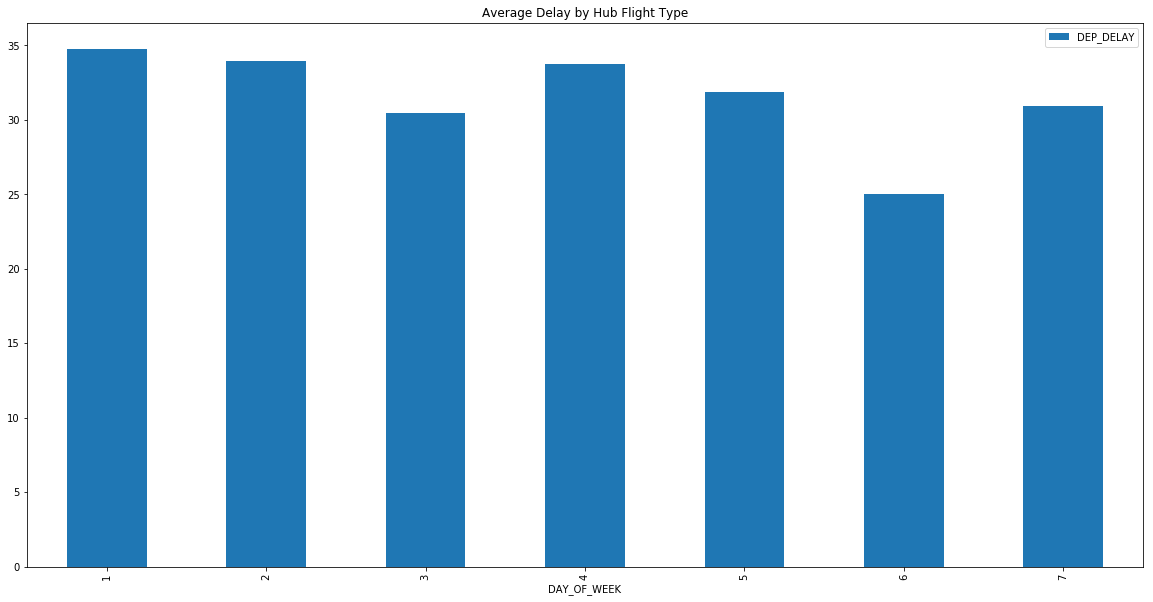

In [138]:
grouped_weekday_delay.plot(kind='bar', title='Average Departure Delay by Hub Flight Type', figsize=(20,10))
plt.savefig("delaybyday.png")
plt.show()

In [136]:
grouped_timeblk = weekday_delay_df.groupby(["DEP_TIME_BLK"])
timeblk = pd.DataFrame(grouped_timeblk["DEP_DELAY"].mean())

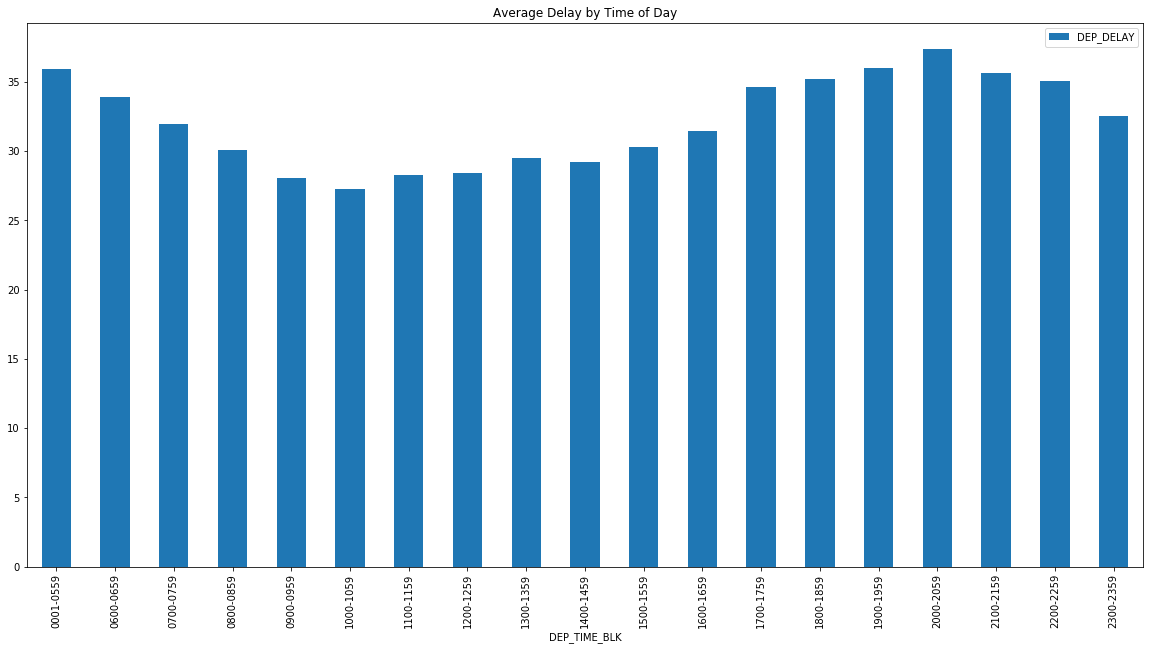

In [139]:
timeblk.plot(kind='bar', title='Average Delay by Time of Day', figsize=(20,10))
plt.savefig("delaybytimeblock.png")
plt.show()

In [2]:
# Create reference to CSV file
csv_path_hub = "cy16-commercial-service-enplanements.csv"

# Import the CSV into a pandas DataFrame
hub_df = pd.read_csv(csv_path_hub, low_memory=False)
hub_df.head()

,Rank,RO,ST,Locid,City,Airport Name,S/L,Hub,CY 16 Enplanements,CY 15 Enplanements,% Change
0,1.0,SO,GA,ATL,Atlanta,Hartsfield - Jackson Atlanta International,P,L,"50,501,858","49,340,732",2.35%
1,2.0,WP,CA,LAX,Los Angeles,Los Angeles International,P,L,"39,636,042","36,351,272",9.04%
2,3.0,GL,IL,ORD,Chicago,Chicago O'Hare International,P,L,"37,589,899","36,305,668",3.54%
3,4.0,SW,TX,DFW,Fort Worth,Dallas-Fort Worth International,P,L,"31,283,579","31,589,839",-0.97%
4,5.0,EA,NY,JFK,New York,John F Kennedy International,P,L,"29,239,151","27,782,369",5.24%


In [11]:
weather_hub_df = pd.DataFrame(weather_df.loc[:,["FL_DATE","CARRIER","ORIGIN","HUB_SIZE","ORIGIN_STATE_ABR","DEST","DEST_HUB_SIZE","DEST_STATE_ABR","DEP_TIME","WEATHER_DELAY","CARRIER_DELAY","NAS_DELAY","SECURITY_DELAY","CANCELLATION_CODE"]])
weather_hub_df.head()

,FL_DATE,CARRIER,ORIGIN,HUB_SIZE,ORIGIN_STATE_ABR,DEST,DEST_HUB_SIZE,DEST_STATE_ABR,DEP_TIME,WEATHER_DELAY,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,CANCELLATION_CODE
0,9/25/2017,B6,SJU,M,PR,STT,S,VI,NaN,NaN,NaN,NaN,NaN,C
1,9/25/2017,B6,AUS,M,TX,BOS,L,MA,1801.0,NaN,NaN,NaN,NaN,NaN
2,9/25/2017,B6,BOS,L,MA,AUS,M,TX,701.0,NaN,NaN,NaN,NaN,NaN
3,9/25/2017,B6,JFK,L,NY,SAV,S,GA,1552.0,NaN,NaN,NaN,NaN,NaN
4,9/25/2017,B6,SAV,S,GA,JFK,L,NY,1902.0,NaN,NaN,NaN,NaN,NaN


In [101]:
hub_weather_delays_df = weather_hub_df.loc[(((weather_hub_df["WEATHER_DELAY"] > 0) | (weather_hub_df["CARRIER_DELAY"] > 0) | (weather_hub_df["NAS_DELAY"] > 0) | (weather_hub_df["SECURITY_DELAY"] > 0)) & ((weather_hub_df["HUB_SIZE"] != "N") & (weather_hub_df["HUB_SIZE"] != "None")) & ((weather_hub_df["DEST_HUB_SIZE"] != "N") & (weather_hub_df["DEST_HUB_SIZE"] != "None")))]
hub_weather_delays_df.reset_index(inplace=True)
hub_weather_delays_df.head()

,index,FL_DATE,CARRIER,ORIGIN,HUB_SIZE,ORIGIN_STATE_ABR,DEST,DEST_HUB_SIZE,DEST_STATE_ABR,DEP_TIME,WEATHER_DELAY,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,CANCELLATION_CODE
0,18,9/25/2017,B6,LAS,L,NV,BOS,L,MA,1219.0,0.0,14.0,11.0,0.0,NaN
1,24,9/25/2017,B6,BOS,L,MA,ATL,L,GA,1003.0,0.0,16.0,0.0,0.0,NaN
2,35,9/25/2017,B6,PDX,L,OR,LGB,S,CA,817.0,0.0,79.0,0.0,0.0,NaN
3,36,9/25/2017,B6,JFK,L,NY,LAX,L,CA,2129.0,0.0,76.0,0.0,0.0,NaN
4,46,9/25/2017,B6,BDL,M,CT,PBI,M,FL,1044.0,0.0,5.0,0.0,0.0,NaN


In [102]:
hub_weather_delays_df["HUB_FLIGHT"] = hub_weather_delays_df["HUB_SIZE"] + hub_weather_delays_df["DEST_HUB_SIZE"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
# Let's group by state now and sum the number of delays.
by_hub_size = hub_weather_delays_df.groupby('HUB_FLIGHT')
weather_delay_average = by_hub_size["WEATHER_DELAY"].mean()
weather_delay_average

HUB_FLIGHT
LL    2.828606
LM    2.583009
LS    3.164990
ML    2.214808
MM    1.346133
MS    0.639344
SL    2.085437
SM    2.038095
SS    0.346154
Name: WEATHER_DELAY, dtype: float64

In [106]:
carrier_delay_average = by_hub_size["CARRIER_DELAY"].mean()
carrier_delay_average

HUB_FLIGHT
LL    19.664661
LM    23.546719
LS    28.050050
ML    23.389952
MM    17.658194
MS    16.453552
SL    33.699354
SM    19.311111
SS    26.615385
Name: CARRIER_DELAY, dtype: float64

In [107]:
nas_delay_average = by_hub_size["NAS_DELAY"].mean()
nas_delay_average

HUB_FLIGHT
LL    20.591230
LM    10.755145
LS    10.879024
ML    19.097216
MM     5.943753
MS     5.811475
SL    25.686142
SM     6.523810
SS    11.576923
Name: NAS_DELAY, dtype: float64

In [108]:
security_delay_average = by_hub_size["SECURITY_DELAY"].mean()
security_delay_average

HUB_FLIGHT
LL    0.098805
LM    0.083148
LS    0.033702
ML    0.037797
MM    0.065441
MS    0.172131
SL    0.049618
SM    0.000000
SS    0.000000
Name: SECURITY_DELAY, dtype: float64

In [51]:
delay_df = pd.DataFrame([weather_delay_average]).T
print(delay_df)

            WEATHER_DELAY
HUB_FLIGHT               
LL               2.828606
LM               2.583009
LS               3.164990
ML               2.214808
MM               1.346133
MS               0.639344
SL               2.085437
SM               2.038095
SS               0.346154


In [110]:
# Plot, we'll put both series in a DataFrame so we can view the arrival and departure delays for each state
delay_df = pd.DataFrame([weather_delay_average, carrier_delay_average, nas_delay_average]).T
delay_df

,WEATHER_DELAY,CARRIER_DELAY,NAS_DELAY
HUB_FLIGHT,,,
LL,2.828606,19.664661,20.591230
LM,2.583009,23.546719,10.755145
LS,3.164990,28.050050,10.879024
ML,2.214808,23.389952,19.097216
MM,1.346133,17.658194,5.943753
MS,0.639344,16.453552,5.811475
SL,2.085437,33.699354,25.686142
SM,2.038095,19.311111,6.523810
SS,0.346154,26.615385,11.576923


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


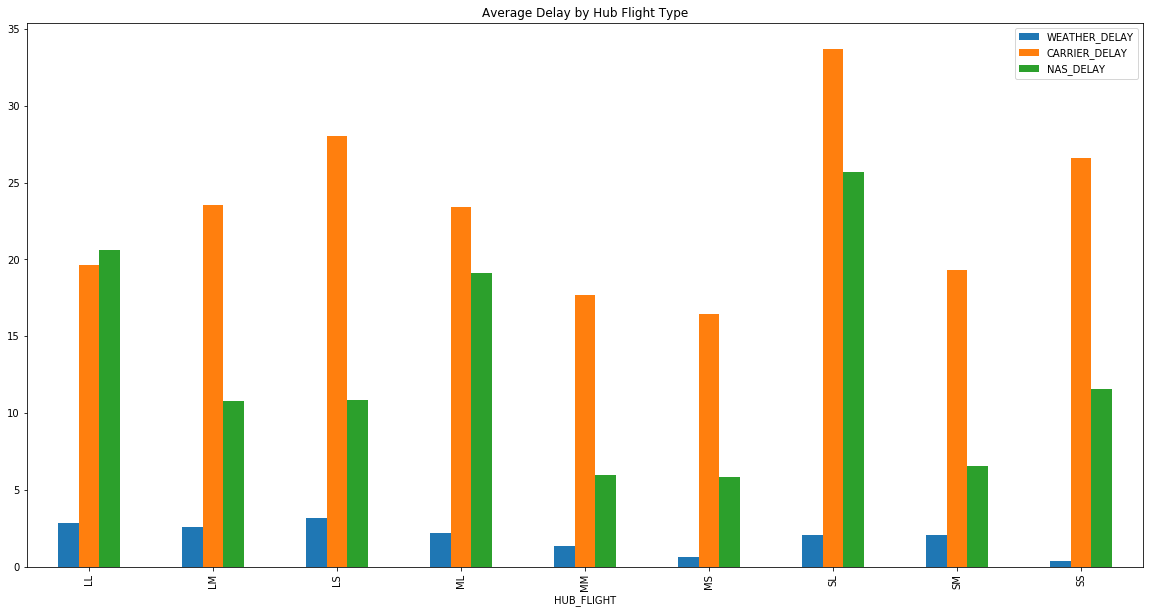

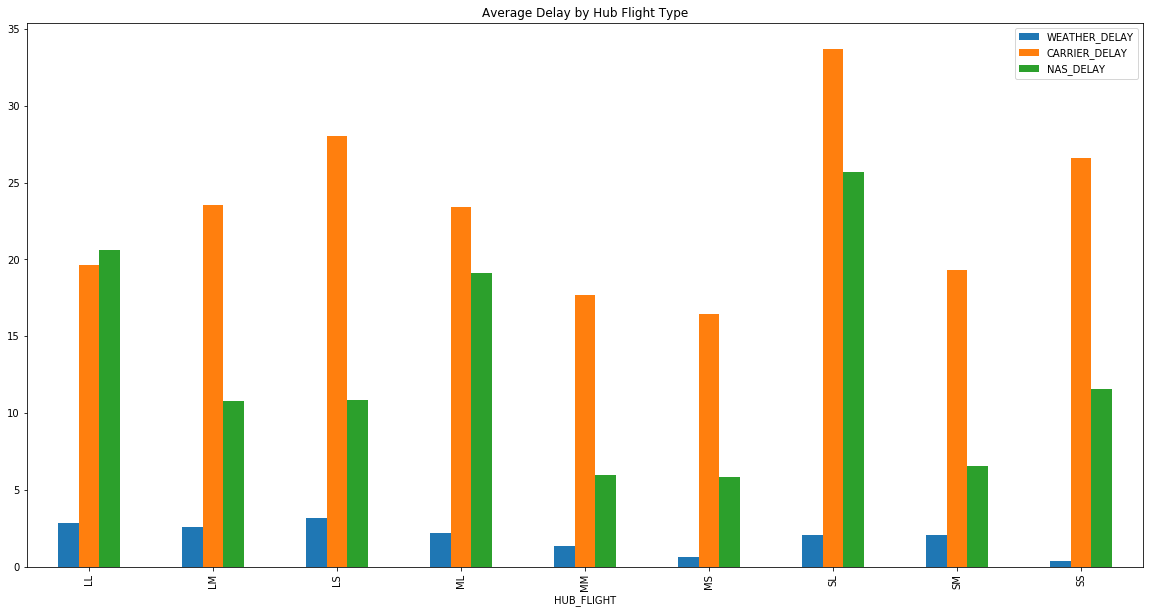

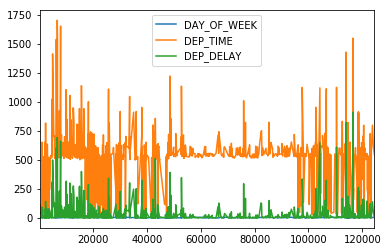

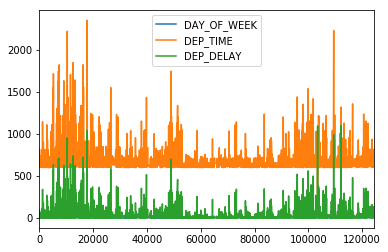

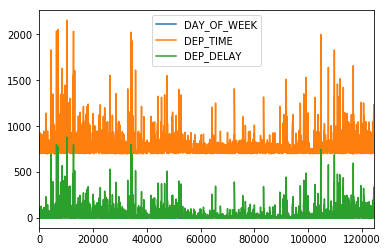

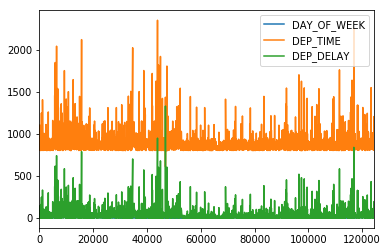

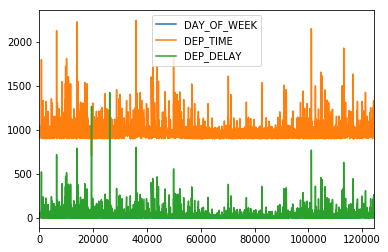

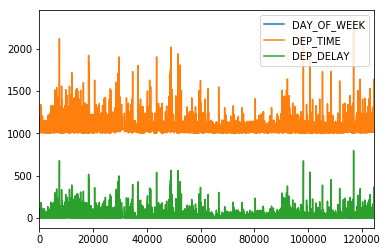

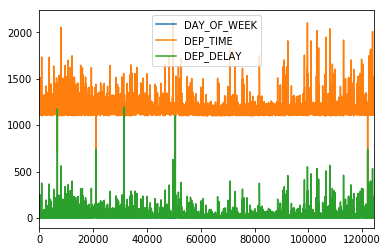

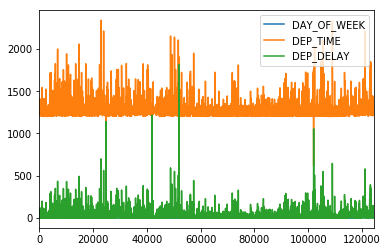

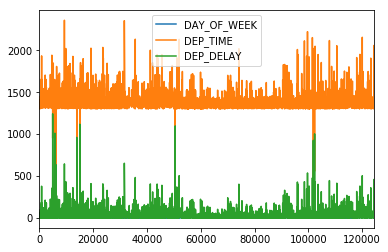

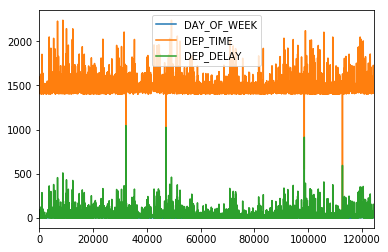

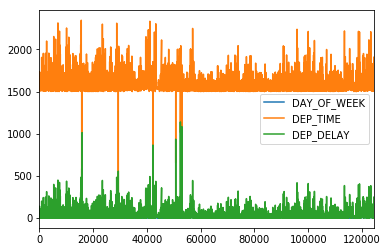

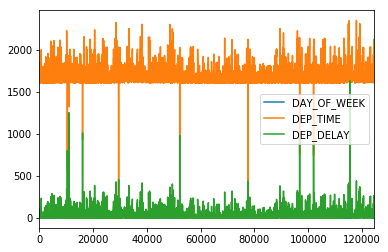

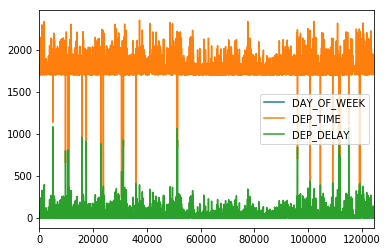

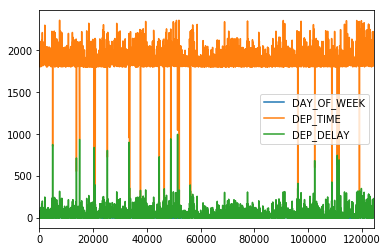

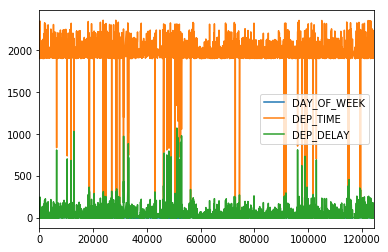

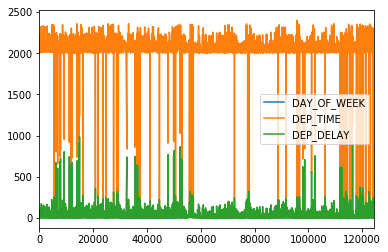

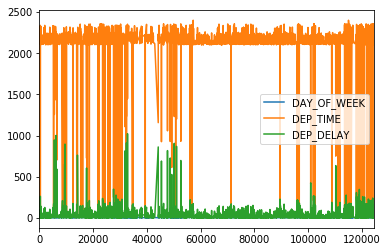

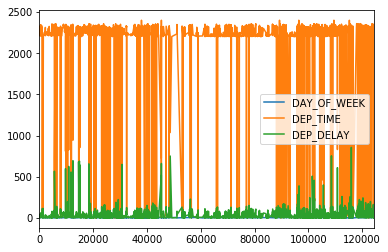

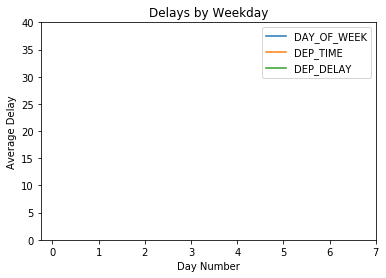

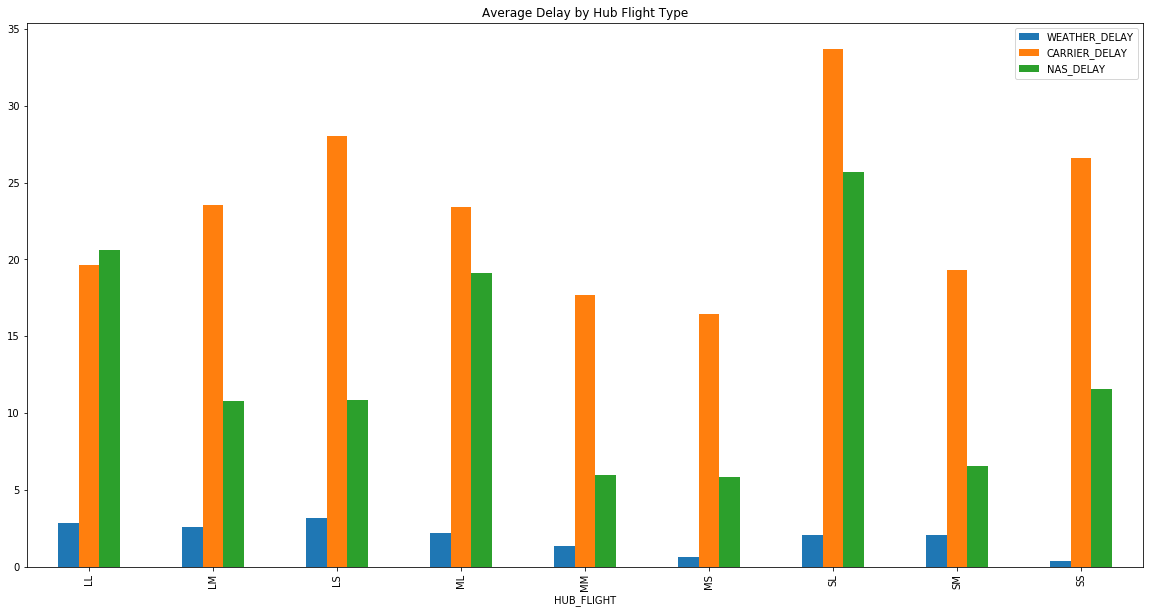

In [135]:
delay_df.plot(kind='bar', title='Average Delay by Hub Flight Type', figsize=(20,10))
plt.savefig("delaybyhub.png")
plt.show()